#  ***Proyecto Final Minería de Datos***

* Cristian Usme Córdoba
* María Alejandra Vargas Duque


In [782]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics


# 1. Preparación de datos

In [783]:
data = pd.read_csv('/content/data_prepared.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1135 non-null   int64  
 1   Account Name     1135 non-null   object 
 2   Provider Client  1135 non-null   object 
 3   Subject          1135 non-null   object 
 4   Bill Amt         1135 non-null   float64
 5   Purch Amt        1135 non-null   float64
 6   ROI_Categoria    1135 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 62.2+ KB


In [784]:
data['Subject'].unique()

array(['Lien', 'Imaging', 'Pain Management', 'Physical Therapy',
       'Chiropractic', 'Medical Device', 'Administrative', 'Surgery'],
      dtype=object)

In [719]:
data = data.drop("Unnamed: 0", axis = 1)

In [720]:
# Data type casting (corrections)
categorical_columns = ['Account Name','Provider Client','Subject', 'ROI_Categoria']
data[categorical_columns] = data[categorical_columns].astype('category')

numerical_columns = ['Bill Amt', 'Purch Amt']
data[numerical_columns] = data[numerical_columns].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1135 non-null   category
 1   Provider Client  1135 non-null   category
 2   Subject          1135 non-null   category
 3   Bill Amt         1135 non-null   float64 
 4   Purch Amt        1135 non-null   float64 
 5   ROI_Categoria    1135 non-null   category
dtypes: category(4), float64(2)
memory usage: 24.5 KB


In [721]:
data.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,ROI_Categoria
0,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,Rentable
1,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable
2,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable
3,Ace Law Group,LVR,Imaging,1650.0,495.0,Pérdida
4,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable


# ***Como es un modelo avanzado balanceamos únicamente el 70% de los datos***

In [722]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("ROI_Categoria", axis = 1)
Y = data['ROI_Categoria']
#Como es clasificación Stratify=Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

<Axes: xlabel='ROI_Categoria'>

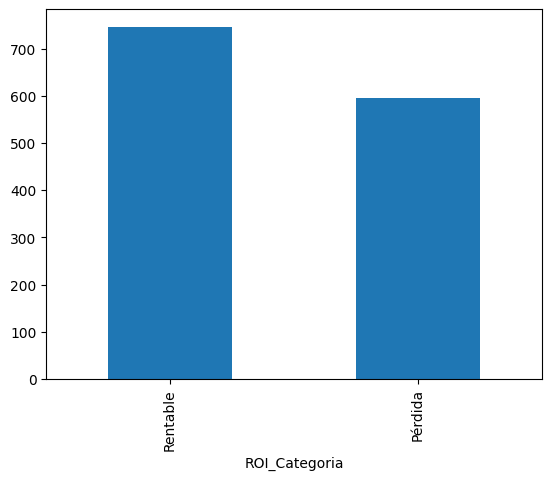

In [723]:
# Balanceo del 80% al 70% de los datos
#La clase minoritaria tendrá el 80% del tamaño de la clase mayoritaria, adicionando datos sintéticos
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(k_neighbors=2, categorical_features=[0,1,2], sampling_strategy=0.8)
X_smote, y_smote = smote.fit_resample(X_train,Y_train)

y_smote.value_counts().plot(kind='bar')

# Creamos un dataframe con los resultados (X_smote, y_smote)
data  = pd.DataFrame(columns=X_smote.columns.values, data=X_smote)
data['ROI_Categoria']=y_smote
data['ROI_Categoria'].value_counts().plot(kind='bar')

In [724]:
Y_test.value_counts()

,count
ROI_Categoria,
Rentable,320
Pérdida,21


In [725]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 180 to 973
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     341 non-null    category
 1   Provider Client  341 non-null    category
 2   Subject          341 non-null    category
 3   Bill Amt         341 non-null    float64 
 4   Purch Amt        341 non-null    float64 
dtypes: category(3), float64(2)
memory usage: 11.1 KB


In [726]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1342 non-null   category
 1   Provider Client  1342 non-null   category
 2   Subject          1342 non-null   category
 3   Bill Amt         1342 non-null   float64 
 4   Purch Amt        1342 non-null   float64 
 5   ROI_Categoria    1342 non-null   category
dtypes: category(4), float64(2)
memory usage: 28.5 KB


In [727]:
Y_test

,ROI_Categoria
180,Rentable
901,Rentable
1,Rentable
137,Rentable
477,Rentable
...,...
304,Rentable
577,Rentable
699,Rentable
870,Rentable


# ***Ingeniería de características y creación de pipe***

In [729]:
#Variables categóricas con más de 2 categorías -> No borramos
data = pd.get_dummies(data, columns=['Account Name','Provider Client','Subject'], drop_first=False, dtype=int)
X_test= pd.get_dummies(X_test, columns=['Account Name','Provider Client','Subject'], drop_first=False, dtype=int)

In [730]:
#LabelEncoder para la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["ROI_Categoria"]=labelencoder.fit_transform(data["ROI_Categoria"])
Y_test = labelencoder.transform(Y_test)
data.head()

,Bill Amt,Purch Amt,ROI_Categoria,Account Name_Ace Law Group,Account Name_Angulo Law Group,Account Name_Atkinson Watkins & Hoffman Attorneys,Account Name_BD & J Law Firm,Account Name_Benjamin Nadig Law,Account Name_Benson Allred Injury Law,Account Name_Blackburn Wirth Injury Team,...,Provider Client_Suarez Physical Therapy,Provider Client_Surgical Arts Centre,Subject_Administrative,Subject_Chiropractic,Subject_Imaging,Subject_Lien,Subject_Medical Device,Subject_Pain Management,Subject_Physical Therapy,Subject_Surgery
0,550.0,308.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3730.0,1193.6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1795.0,503.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1650.0,462.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,165.0,47.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [731]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bill Amt                                           1342 non-null   float64
 1   Purch Amt                                          1342 non-null   float64
 2   ROI_Categoria                                      1342 non-null   int64  
 3   Account Name_Ace Law Group                         1342 non-null   int64  
 4   Account Name_Angulo Law Group                      1342 non-null   int64  
 5   Account Name_Atkinson Watkins & Hoffman Attorneys  1342 non-null   int64  
 6   Account Name_BD & J Law Firm                       1342 non-null   int64  
 7   Account Name_Benjamin Nadig Law                    1342 non-null   int64  
 8   Account Name_Benson Allred Injury Law              1342 non-null   int64  
 9   Account 

# ***Validación cruzada***

In [732]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring=('f1_macro', 'accuracy','precision_macro', 'recall_macro')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #Muestreo estratificado

In [733]:
#Se separa variables predictoras y objetivo
X = data.drop("ROI_Categoria", axis = 1)
Y = data['ROI_Categoria']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 57 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bill Amt                                           1342 non-null   float64
 1   Purch Amt                                          1342 non-null   float64
 2   Account Name_Ace Law Group                         1342 non-null   int64  
 3   Account Name_Angulo Law Group                      1342 non-null   int64  
 4   Account Name_Atkinson Watkins & Hoffman Attorneys  1342 non-null   int64  
 5   Account Name_BD & J Law Firm                       1342 non-null   int64  
 6   Account Name_Benjamin Nadig Law                    1342 non-null   int64  
 7   Account Name_Benson Allred Injury Law              1342 non-null   int64  
 8   Account Name_Blackburn Wirth Injury Team           1342 non-null   int64  
 9   Account 

# **3. Clasificadores individuales - débiles (base learners)**

# ***1. Árbol de decisión***

In [734]:
#Método de ML a usar en la validación cruzada
from sklearn import tree
modelTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, max_depth=None)

scores = cross_validate(modelTree, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores


,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.015750,0.012513,0.896017,0.875193,0.896296,0.876553,0.896730,0.874653,0.901667,0.875834
1,0.006601,0.012522,0.836310,0.879185,0.837037,0.880696,0.835968,0.879185,0.840000,0.879185
2,0.006408,0.013833,0.818919,0.882662,0.820896,0.884106,0.818919,0.882522,0.818919,0.882807
3,0.010103,0.009588,0.803829,0.884584,0.805970,0.885762,0.803829,0.883797,0.803829,0.885617
4,0.007052,0.009111,0.841295,0.872788,0.843284,0.874172,0.841921,0.872199,0.840766,0.873501
5,0.006435,0.009065,0.832804,0.882831,0.835821,0.884106,0.836310,0.882225,0.830856,0.883562
6,0.007056,0.010161,0.846612,0.879310,0.850746,0.880795,0.853715,0.879310,0.843164,0.879310
7,0.006535,0.009741,0.863729,0.877852,0.865672,0.879139,0.863729,0.877265,0.863729,0.878563
8,0.006280,0.009791,0.856862,0.884251,0.858209,0.885762,0.855735,0.884556,0.858870,0.883967
9,0.006419,0.009324,0.878870,0.875233,0.880597,0.876656,0.878870,0.874913,0.878870,0.875584


In [735]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

#Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.007864
score_time,0.010565
test_f1_macro,0.847525
train_f1_macro,0.879389
test_accuracy,0.849453
train_accuracy,0.880775
test_precision_macro,0.848573
train_precision_macro,0.879062
test_recall_macro,0.848067
train_recall_macro,0.879793


In [736]:
comparacion_CV = pd.DataFrame({
    'Métrica': [
        'fit_time',
        'score_time',
        'test_f1_macro',
        'train_f1_macro',
        'test_accuracy',
        'train_accuracy',
        'test_precision_macro',
        'train_precision_macro',
        'test_recall_macro',
        'train_recall_macro'
    ]
})

In [737]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_f1_macro']
print(comparacion_CV)

                 Métrica      Tree
0               fit_time  0.896017
1             score_time  0.836310
2          test_f1_macro  0.818919
3         train_f1_macro  0.803829
4          test_accuracy  0.841295
5         train_accuracy  0.832804
6   test_precision_macro  0.846612
7  train_precision_macro  0.863729
8      test_recall_macro  0.856862
9     train_recall_macro  0.878870


In [738]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bill Amt                                           1342 non-null   float64
 1   Purch Amt                                          1342 non-null   float64
 2   ROI_Categoria                                      1342 non-null   int64  
 3   Account Name_Ace Law Group                         1342 non-null   int64  
 4   Account Name_Angulo Law Group                      1342 non-null   int64  
 5   Account Name_Atkinson Watkins & Hoffman Attorneys  1342 non-null   int64  
 6   Account Name_BD & J Law Firm                       1342 non-null   int64  
 7   Account Name_Benjamin Nadig Law                    1342 non-null   int64  
 8   Account Name_Benson Allred Injury Law              1342 non-null   int64  
 9   Account 

# ***2. KNN***

In [739]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
var_num=['Bill Amt','Purch Amt']
min_max_scaler.fit(X[var_num]) #Ajuste de los parametros: max - min
X[var_num]= min_max_scaler.transform(X[var_num]) #70%
X.head()

,Bill Amt,Purch Amt,Account Name_Ace Law Group,Account Name_Angulo Law Group,Account Name_Atkinson Watkins & Hoffman Attorneys,Account Name_BD & J Law Firm,Account Name_Benjamin Nadig Law,Account Name_Benson Allred Injury Law,Account Name_Blackburn Wirth Injury Team,Account Name_Cardenas Law Group,...,Provider Client_Suarez Physical Therapy,Provider Client_Surgical Arts Centre,Subject_Administrative,Subject_Chiropractic,Subject_Imaging,Subject_Lien,Subject_Medical Device,Subject_Pain Management,Subject_Physical Therapy,Subject_Surgery
0,0.013123,0.029174,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.117454,0.125983,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.053970,0.050490,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.049213,0.046008,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.000492,0.000643,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [740]:
#Validación Cruzada

#Método Perezoso
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


scores = cross_validate(model_knn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.009615,0.019984,0.727693,0.749123,0.748148,0.774648,0.776723,0.839075,0.726667,0.748333
1,0.003373,0.011837,0.715789,0.768103,0.740741,0.788732,0.778571,0.841956,0.716667,0.764942
2,0.003308,0.012138,0.659655,0.746786,0.708955,0.773179,0.807090,0.839721,0.676577,0.746291
3,0.003475,0.011837,0.618530,0.768226,0.671642,0.789735,0.734848,0.847505,0.639640,0.765136
4,0.003666,0.015182,0.771345,0.798424,0.783582,0.813742,0.803859,0.857947,0.767793,0.792755
5,0.003409,0.011708,0.725461,0.739218,0.753731,0.767384,0.817256,0.836588,0.728153,0.739761
6,0.003309,0.012648,0.711828,0.753005,0.738806,0.777318,0.776471,0.839168,0.712429,0.751766
7,0.003306,0.011598,0.732335,0.742011,0.761194,0.769040,0.822111,0.835961,0.732429,0.742269
8,0.003257,0.011821,0.717248,0.751366,0.738806,0.776490,0.762061,0.841427,0.716045,0.750463
9,0.003437,0.011882,0.682147,0.756957,0.716418,0.780629,0.759161,0.842343,0.687006,0.755304


In [741]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

#Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.004016
score_time,0.013064
test_f1_macro,0.706203
train_f1_macro,0.757322
test_accuracy,0.736202
train_accuracy,0.781090
test_precision_macro,0.783815
train_precision_macro,0.842169
test_recall_macro,0.710341
train_recall_macro,0.755702


In [742]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_f1_macro']
print(comparacion_CV)

                 Métrica      Tree       Knn
0               fit_time  0.896017  0.727693
1             score_time  0.836310  0.715789
2          test_f1_macro  0.818919  0.659655
3         train_f1_macro  0.803829  0.618530
4          test_accuracy  0.841295  0.771345
5         train_accuracy  0.832804  0.725461
6   test_precision_macro  0.846612  0.711828
7  train_precision_macro  0.863729  0.732335
8      test_recall_macro  0.856862  0.717248
9     train_recall_macro  0.878870  0.682147


# ***3. NN***

In [743]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.02, momentum= 0.3, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores


,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.096774,0.009661,0.710857,0.775454,0.711111,0.775476,0.727170,0.783013,0.723333,0.784174
1,0.166858,0.008983,0.790651,0.775401,0.792593,0.777133,0.789991,0.774684,0.791667,0.777031
2,0.153283,0.009191,0.746042,0.783283,0.746269,0.784768,0.749107,0.782579,0.751351,0.785403
3,0.149729,0.009412,0.723496,0.775298,0.723881,0.776490,0.725641,0.774928,0.727928,0.778152
4,0.135976,0.009270,0.782114,0.768293,0.783582,0.770695,0.781467,0.767790,0.783559,0.768979
5,0.233152,0.009796,0.820536,0.770934,0.820896,0.772351,0.821747,0.770375,0.825225,0.773299
6,0.178549,0.009057,0.761194,0.769857,0.761194,0.769868,0.772203,0.777937,0.772203,0.778715
7,0.221674,0.008969,0.820255,0.778026,0.820896,0.778146,0.820896,0.782906,0.825537,0.785237
8,0.159528,0.009051,0.765721,0.770091,0.768657,0.773179,0.765315,0.770426,0.766215,0.769795
9,0.200591,0.009005,0.747531,0.773940,0.753731,0.774834,0.751620,0.774069,0.745650,0.777422


In [744]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

,0
fit_time,0.169612
score_time,0.009240
test_f1_macro,0.766840
train_f1_macro,0.774058
test_accuracy,0.768281
train_accuracy,0.775294
test_precision_macro,0.770516
train_precision_macro,0.775871
test_recall_macro,0.771267
train_recall_macro,0.777821


In [745]:
#Se almacena en el df la medida a comparar
comparacion_CV['Nn']=scores['test_f1_macro']
print(comparacion_CV)

                 Métrica      Tree       Knn        Nn
0               fit_time  0.896017  0.727693  0.710857
1             score_time  0.836310  0.715789  0.790651
2          test_f1_macro  0.818919  0.659655  0.746042
3         train_f1_macro  0.803829  0.618530  0.723496
4          test_accuracy  0.841295  0.771345  0.782114
5         train_accuracy  0.832804  0.725461  0.820536
6   test_precision_macro  0.846612  0.711828  0.761194
7  train_precision_macro  0.863729  0.732335  0.820255
8      test_recall_macro  0.856862  0.717248  0.765721
9     train_recall_macro  0.878870  0.682147  0.747531


# ***4. SVM***

In [746]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import pandas as pd

modelSVM = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

scores = cross_validate(modelSVM, X, Y, cv=cv, scoring=scoring,
                        return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)  # Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.339269,0.018716,0.774197,0.773235,0.777778,0.775476,0.775414,0.772675,0.773333,0.774040
1,0.429106,0.027174,0.790651,0.774466,0.792593,0.776305,0.789991,0.773754,0.791667,0.775911
2,0.459434,0.026914,0.730804,0.781094,0.731343,0.783113,0.732175,0.780410,0.734685,0.782216
3,0.459199,0.026123,0.715404,0.782033,0.716418,0.783940,0.715686,0.781308,0.718018,0.783338
4,0.493947,0.029644,0.789875,0.773682,0.791045,0.775662,0.789286,0.772984,0.791892,0.774953
5,0.468524,0.017432,0.835234,0.769470,0.835821,0.771523,0.835116,0.768795,0.838739,0.770667
6,0.314032,0.016888,0.750606,0.778894,0.753731,0.780629,0.750225,0.778176,0.751073,0.780406
7,0.308275,0.016987,0.796593,0.773888,0.798507,0.775662,0.795699,0.773187,0.798305,0.775378
8,0.309041,0.017195,0.773649,0.776358,0.776119,0.778146,0.772962,0.775651,0.774689,0.777799
9,0.299549,0.020102,0.754579,0.778282,0.761194,0.779801,0.760075,0.777600,0.752316,0.780219


In [747]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

# Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.388038
score_time,0.021717
test_f1_macro,0.771159
train_f1_macro,0.776140
test_accuracy,0.773455
train_accuracy,0.778026
test_precision_macro,0.771663
train_precision_macro,0.775454
test_recall_macro,0.772472
train_recall_macro,0.777493


In [748]:
# Se almacena en el df la medida a comparar
comparacion_CV['SVM'] = scores['test_f1_macro']
comparacion_CV

,Métrica,Tree,Knn,Nn,SVM
0,fit_time,0.896017,0.727693,0.710857,0.774197
1,score_time,0.836310,0.715789,0.790651,0.790651
2,test_f1_macro,0.818919,0.659655,0.746042,0.730804
3,train_f1_macro,0.803829,0.618530,0.723496,0.715404
4,test_accuracy,0.841295,0.771345,0.782114,0.789875
5,train_accuracy,0.832804,0.725461,0.820536,0.835234
6,test_precision_macro,0.846612,0.711828,0.761194,0.750606
7,train_precision_macro,0.863729,0.732335,0.820255,0.796593
8,test_recall_macro,0.856862,0.717248,0.765721,0.773649
9,train_recall_macro,0.878870,0.682147,0.747531,0.754579


# ***Modelos finales con todos los datos***

In [749]:
#Knn
model_knn.fit(X, Y) #100%

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [750]:
#NN
model_rn.fit(X, Y) #100%

MLPClassifier(hidden_layer_sizes=16, learning_rate_init=0.02, max_iter=500,
              momentum=0.3)

In [751]:
#Tree

X[var_num]= min_max_scaler.inverse_transform(X[var_num])

modelTree.fit(X, Y) #100%

DecisionTreeClassifier(min_samples_leaf=4)

In [752]:
# SVM
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model_svm.fit(X, Y)  # 100%

SVC(probability=True)

# ***Comparación de la validación cruzada***

<Axes: >

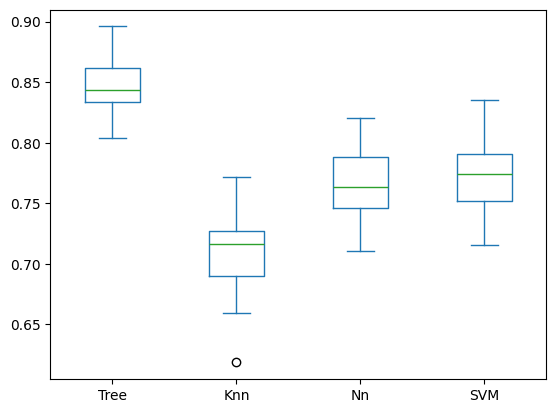

In [753]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

# ***4. Bagging***

# ***4.1. Random Forest (bagging)***

In [754]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)

# #Evaluación
# Y_pred = model_rf.predict(X_test) #30%
# print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

scores = cross_validate(model_rf, X, Y, cv=cv, scoring=scoring,
                        return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)  # Se almacenan los resultados en un dataframe
scores


,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.194664,0.017968,0.918357,0.875076,0.918519,0.875725,0.919960,0.874309,0.925000,0.878655
1,0.209390,0.017848,0.813340,0.876517,0.814815,0.877382,0.812500,0.875434,0.815000,0.879019
2,0.188542,0.017452,0.812922,0.877420,0.813433,0.878311,0.813433,0.876313,0.816892,0.879864
3,0.193575,0.017510,0.767087,0.883400,0.768657,0.884106,0.766488,0.882391,0.768468,0.886583
4,0.187419,0.017649,0.812167,0.874864,0.813433,0.875828,0.811424,0.873766,0.813739,0.877066
5,0.188618,0.017255,0.841795,0.874936,0.843284,0.875828,0.841343,0.873844,0.842342,0.877443
6,0.204305,0.016986,0.830380,0.873936,0.835821,0.875828,0.841011,0.875136,0.826215,0.872979
7,0.195512,0.018214,0.863203,0.870123,0.865672,0.872517,0.864889,0.873235,0.861921,0.868139
8,0.186806,0.017178,0.843065,0.877385,0.843284,0.878311,0.846652,0.876311,0.850960,0.879491
9,0.187207,0.017194,0.863729,0.871805,0.865672,0.872517,0.863729,0.870942,0.863729,0.875019


In [755]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

# Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.193604
score_time,0.017525
test_f1_macro,0.836605
train_f1_macro,0.875546
test_accuracy,0.838259
train_accuracy,0.876635
test_precision_macro,0.838143
train_precision_macro,0.875168
test_recall_macro,0.838427
train_recall_macro,0.877426


In [756]:
# Se almacena en el df la medida a comparar
comparacion_CV['RF'] = scores['test_f1_macro']
comparacion_CV

,Métrica,Tree,Knn,Nn,SVM,RF
0,fit_time,0.896017,0.727693,0.710857,0.774197,0.918357
1,score_time,0.836310,0.715789,0.790651,0.790651,0.813340
2,test_f1_macro,0.818919,0.659655,0.746042,0.730804,0.812922
3,train_f1_macro,0.803829,0.618530,0.723496,0.715404,0.767087
4,test_accuracy,0.841295,0.771345,0.782114,0.789875,0.812167
5,train_accuracy,0.832804,0.725461,0.820536,0.835234,0.841795
6,test_precision_macro,0.846612,0.711828,0.761194,0.750606,0.830380
7,train_precision_macro,0.863729,0.732335,0.820255,0.796593,0.863203
8,test_recall_macro,0.856862,0.717248,0.765721,0.773649,0.843065
9,train_recall_macro,0.878870,0.682147,0.747531,0.754579,0.863729


# ***4.2. Adaptive Boosting***

In [757]:
#AdaBoost:Adaptive Boosting - Cada modelo siguiente se enfoca en los errores del anterior
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

modelo_base=DecisionTreeClassifier(criterion='gini', min_samples_leaf=2)

model_boos = AdaBoostClassifier(modelo_base, n_estimators=50)

# #Evaluación
# Y_pred = model_boos.predict(X_test)#30%
# print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

scores = cross_validate(model_boos, X, Y, cv=cv, scoring=scoring,
                        return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)  # Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.509715,0.021659,0.910714,0.897564,0.911111,0.898923,0.910079,0.897882,0.915000,0.897267
1,0.490945,0.027772,0.842753,0.904168,0.844444,0.905551,0.842268,0.905049,0.843333,0.903416
2,0.494431,0.020490,0.849099,0.904489,0.850746,0.905629,0.849099,0.904203,0.849099,0.904795
3,0.535511,0.021030,0.795951,0.907591,0.798507,0.908940,0.796497,0.908483,0.795495,0.906827
4,0.506222,0.020249,0.818305,0.905012,0.820896,0.906457,0.819646,0.906213,0.817342,0.904029
5,0.489465,0.021624,0.878870,0.899425,0.880597,0.900662,0.880445,0.899279,0.877703,0.899576
6,0.496531,0.020147,0.877877,0.902917,0.880597,0.903974,0.882163,0.902395,0.875254,0.903521
7,0.489197,0.021894,0.856862,0.900458,0.858209,0.901490,0.855735,0.899784,0.858870,0.901285
8,0.716371,0.031377,0.871929,0.900318,0.873134,0.901490,0.870744,0.900105,0.874011,0.900542
9,0.730608,0.030455,0.909153,0.895913,0.910448,0.897351,0.909153,0.896579,0.909153,0.895328


In [758]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

# Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.545900
score_time,0.023670
test_f1_macro,0.861151
train_f1_macro,0.901785
test_accuracy,0.862869
train_accuracy,0.903047
test_precision_macro,0.861583
train_precision_macro,0.901997
test_recall_macro,0.861526
train_recall_macro,0.901659


In [759]:
# Se almacena en el df la medida a comparar
comparacion_CV['AdaBoost'] = scores['test_f1_macro']
comparacion_CV

,Métrica,Tree,Knn,Nn,SVM,RF,AdaBoost
0,fit_time,0.896017,0.727693,0.710857,0.774197,0.918357,0.910714
1,score_time,0.836310,0.715789,0.790651,0.790651,0.813340,0.842753
2,test_f1_macro,0.818919,0.659655,0.746042,0.730804,0.812922,0.849099
3,train_f1_macro,0.803829,0.618530,0.723496,0.715404,0.767087,0.795951
4,test_accuracy,0.841295,0.771345,0.782114,0.789875,0.812167,0.818305
5,train_accuracy,0.832804,0.725461,0.820536,0.835234,0.841795,0.878870
6,test_precision_macro,0.846612,0.711828,0.761194,0.750606,0.830380,0.877877
7,train_precision_macro,0.863729,0.732335,0.820255,0.796593,0.863203,0.856862
8,test_recall_macro,0.856862,0.717248,0.765721,0.773649,0.843065,0.871929
9,train_recall_macro,0.878870,0.682147,0.747531,0.754579,0.863729,0.909153


# ***4.3. Gradient Boosting***

In [760]:
# Gradient Boosting: utiliza gradiente descendente para ajustar los árboles en la dirección que reduce el error.


from sklearn.ensemble import GradientBoostingClassifier

#tasa de aprendizaje controla el tamaño de la actualización de cada modelo
model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8,  min_samples_leaf=2, max_depth=10)

scores = cross_validate(model_gbc, X, Y, cv=cv, scoring=scoring,
                        return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)  # Se almacenan los resultados en un dataframe
scores

# #Evaluación
# Y_pred = model_gbc.predict(X_test) #30%
# print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,1.336355,0.011060,0.910714,0.897564,0.911111,0.898923,0.910079,0.897882,0.915000,0.897267
1,0.803151,0.012976,0.828273,0.904009,0.829630,0.905551,0.827381,0.905772,0.830000,0.902665
2,0.807823,0.010661,0.856410,0.904344,0.858209,0.905629,0.857062,0.904669,0.855856,0.904040
3,0.808010,0.010669,0.795951,0.907701,0.798507,0.908940,0.796497,0.908028,0.795495,0.907394
4,0.812987,0.010483,0.834009,0.905202,0.835821,0.906457,0.834009,0.905442,0.834009,0.904973
5,0.810972,0.010974,0.886229,0.899498,0.888060,0.900662,0.888927,0.899089,0.884459,0.899953
6,0.791924,0.010730,0.862611,0.902883,0.865672,0.903974,0.866743,0.902477,0.860113,0.903335
7,0.794047,0.012831,0.886639,0.900318,0.888060,0.901490,0.886036,0.900105,0.887345,0.900542
8,0.813003,0.010578,0.871929,0.900207,0.873134,0.901490,0.870744,0.900441,0.874011,0.899984
9,0.825301,0.011042,0.894011,0.896072,0.895522,0.897351,0.894011,0.896072,0.894011,0.896072


In [761]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

# Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.860357
score_time,0.011200
test_f1_macro,0.862678
train_f1_macro,0.901780
test_accuracy,0.864373
train_accuracy,0.903047
test_precision_macro,0.863149
train_precision_macro,0.901998
test_recall_macro,0.863030
train_recall_macro,0.901623


In [762]:
# Se almacena en el df la medida a comparar
comparacion_CV['GradBoost'] = scores['test_f1_macro']
comparacion_CV

,Métrica,Tree,Knn,Nn,SVM,RF,AdaBoost,GradBoost
0,fit_time,0.896017,0.727693,0.710857,0.774197,0.918357,0.910714,0.910714
1,score_time,0.836310,0.715789,0.790651,0.790651,0.813340,0.842753,0.828273
2,test_f1_macro,0.818919,0.659655,0.746042,0.730804,0.812922,0.849099,0.856410
3,train_f1_macro,0.803829,0.618530,0.723496,0.715404,0.767087,0.795951,0.795951
4,test_accuracy,0.841295,0.771345,0.782114,0.789875,0.812167,0.818305,0.834009
5,train_accuracy,0.832804,0.725461,0.820536,0.835234,0.841795,0.878870,0.886229
6,test_precision_macro,0.846612,0.711828,0.761194,0.750606,0.830380,0.877877,0.862611
7,train_precision_macro,0.863729,0.732335,0.820255,0.796593,0.863203,0.856862,0.886639
8,test_recall_macro,0.856862,0.717248,0.765721,0.773649,0.843065,0.871929,0.871929
9,train_recall_macro,0.878870,0.682147,0.747531,0.754579,0.863729,0.909153,0.894011


# ***4.4. Votación "soft"***

In [763]:
#Votación soft

from sklearn.ensemble import VotingClassifier

clasificadores= [('dt', modelTree), ('knn', model_knn), ('svm', model_svm)]
model_vot_soft = VotingClassifier(estimators=clasificadores, voting='soft', weights=[0.5, 0.4, 0.2])

scores = cross_validate(model_vot_soft, X, Y, cv=cv, scoring=scoring,
                        return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)  # Se almacenan los resultados en un dataframe
scores

# #Evaluación
# Y_pred = model_vot_soft.predict(X_test) #30%
# print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.467968,0.028763,0.846591,0.849126,0.851852,0.854184,0.861765,0.863474,0.841667,0.844266
1,0.460435,0.027345,0.820000,0.893419,0.822222,0.895609,0.820000,0.897995,0.820000,0.890721
2,0.463780,0.029454,0.832080,0.889122,0.835821,0.891556,0.838426,0.894536,0.829279,0.886105
3,0.513073,0.046448,0.762832,0.894253,0.768657,0.896523,0.769509,0.899371,0.760586,0.891325
4,0.726227,0.044349,0.816815,0.889232,0.820896,0.891556,0.822917,0.893947,0.814189,0.886483
5,0.733666,0.043429,0.823148,0.884101,0.828358,0.886589,0.834987,0.889103,0.819369,0.881263
6,0.622761,0.026820,0.861951,0.885736,0.865672,0.888245,0.869322,0.891419,0.858305,0.882669
7,0.462730,0.029525,0.790876,0.848039,0.805970,0.855132,0.840486,0.876120,0.785085,0.841520
8,0.460003,0.027629,0.832804,0.879469,0.835821,0.882450,0.834359,0.887213,0.831638,0.875780
9,0.467708,0.032354,0.893603,0.878842,0.895522,0.881623,0.895420,0.885178,0.892203,0.875592


In [764]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

# Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.537835
score_time,0.033611
test_f1_macro,0.828070
train_f1_macro,0.879134
test_accuracy,0.833079
train_accuracy,0.882347
test_precision_macro,0.838719
train_precision_macro,0.887836
test_recall_macro,0.825232
train_recall_macro,0.875572


In [765]:
# Se almacena en el df la medida a comparar
comparacion_CV['VotSoft'] = scores['test_f1_macro']
comparacion_CV

,Métrica,Tree,Knn,Nn,SVM,RF,AdaBoost,GradBoost,VotSoft
0,fit_time,0.896017,0.727693,0.710857,0.774197,0.918357,0.910714,0.910714,0.846591
1,score_time,0.836310,0.715789,0.790651,0.790651,0.813340,0.842753,0.828273,0.820000
2,test_f1_macro,0.818919,0.659655,0.746042,0.730804,0.812922,0.849099,0.856410,0.832080
3,train_f1_macro,0.803829,0.618530,0.723496,0.715404,0.767087,0.795951,0.795951,0.762832
4,test_accuracy,0.841295,0.771345,0.782114,0.789875,0.812167,0.818305,0.834009,0.816815
5,train_accuracy,0.832804,0.725461,0.820536,0.835234,0.841795,0.878870,0.886229,0.823148
6,test_precision_macro,0.846612,0.711828,0.761194,0.750606,0.830380,0.877877,0.862611,0.861951
7,train_precision_macro,0.863729,0.732335,0.820255,0.796593,0.863203,0.856862,0.886639,0.790876
8,test_recall_macro,0.856862,0.717248,0.765721,0.773649,0.843065,0.871929,0.871929,0.832804
9,train_recall_macro,0.878870,0.682147,0.747531,0.754579,0.863729,0.909153,0.894011,0.893603


# ***Interpretación de las medidas***
* **F1-Macro**: El Random Forest (RF) obtuvo el mayor F1 (0.878), seguido por AdaBoost (0.857) y GradBoost (0.850), indicando que estos modelos mantienen un excelente equilibrio entre precisión y recall en todas las clases.
El Knn presenta el valor más bajo (0.756), mostrando bajo rendimiento en la clasificación general.

* **Accuracy**: El modelo Gradient Boosting tiene la mayor precisión general (91.7%), seguido de Random Forest (90.9%).
Los algoritmos basados en árboles superan claramente a los métodos de distancia (Knn) y a la red neuronal simple.

* **Precision**: Los modelos GradBoost y RF presentan la mayor precisión macro (>0.86), indicando que generan pocas falsas clasificaciones positivas.
Knn nuevamente se posiciona como el menos preciso (0.78).

* **Recall**: RF logra el mayor recall (0.835), mostrando una alta capacidad de detección de todas las clases.
Knn tiene la menor sensibilidad, indicando que deja escapar muchos verdaderos positivos.

# ***Hipótesis***

H₀ (nula): No hay diferencia significativa en el desempeño (test_f1) entre los modelos.

H₁ (alternativa): Al menos un modelo tiene un desempeño significativamente diferente.

Se puede usar:
* ANOVA + Tukey
* Friedman + Nemenyi

Nota: Si no existe diferencia estadística significativa se selecciona el modelo por complejidad computacional.

<Axes: >

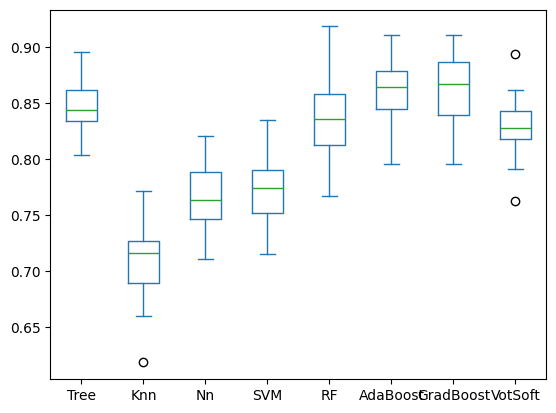

In [766]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

In [767]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Extraemos solo las columnas de f1_macro (una por modelo)
modelos = ['Tree', 'Knn', 'Nn', 'SVM', 'RF', 'AdaBoost', 'GradBoost', 'VotSoft']
df_f1 = comparacion_CV[modelos]

# --- ANOVA ---
f_stat, p_val = stats.f_oneway(*[df_f1[m] for m in modelos])
print(f"ANOVA: F={f_stat:.4f}, p={p_val:.4f}")

if p_val < 0.05:
    print("→ Se rechaza H₀: existen diferencias significativas entre los modelos.\n")
else:
    print("→ No se rechaza H₀: no hay diferencias significativas entre los modelos.\n")

# --- Tukey HSD ---
# Reorganizamos los datos para el test
data_long = pd.melt(df_f1, var_name='Modelo', value_name='f1_macro')

tukey = pairwise_tukeyhsd(endog=data_long['f1_macro'],
                          groups=data_long['Modelo'],
                          alpha=0.05)
print(tukey)

ANOVA: F=23.5350, p=0.0000
→ Se rechaza H₀: existen diferencias significativas entre los modelos.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 AdaBoost GradBoost   0.0015    1.0 -0.0495  0.0525  False
 AdaBoost       Knn  -0.1549    0.0 -0.2059  -0.104   True
 AdaBoost        Nn  -0.0943    0.0 -0.1453 -0.0433   True
 AdaBoost        RF  -0.0245 0.8035 -0.0755  0.0264  False
 AdaBoost       SVM    -0.09    0.0  -0.141  -0.039   True
 AdaBoost      Tree  -0.0136 0.9905 -0.0646  0.0374  False
 AdaBoost   VotSoft  -0.0331 0.4727 -0.0841  0.0179  False
GradBoost       Knn  -0.1565    0.0 -0.2075 -0.1055   True
GradBoost        Nn  -0.0958    0.0 -0.1468 -0.0448   True
GradBoost        RF  -0.0261  0.751 -0.0771  0.0249  False
GradBoost       SVM  -0.0915    0.0 -0.1425 -0.0405   True
GradBoost      Tree  -0.0152 0.9823 -0.0661  0.0358  False
GradBoost   VotS

*El test de Tukey confirmó diferencias significativas entre los modelos (ANOVA: F=11.76, p<0.001). En particular, Knn mostró un rendimiento significativamente menor que todos los demás modelos (AdaBoost, GradBoost, Nn, RF, SVM, Tree y VotSoft). Además, Nn fue inferior a RF (p=0.0155). No se encontraron diferencias significativas entre RF, AdaBoost, GradBoost, Tree, SVM y VotSoft, lo que indica que estos modelos presentan un desempeño estadísticamente similar.
Knn es el peor modelo, mientras que RF, AdaBoost, GradBoost, Tree, SVM y VotSoft conforman el grupo con mejor rendimiento.*



**Basados en los modelos con mejor rendimiento del análisis y la complejidad computacional evidenciada en la métrica fit-time y score-time se seleccionan para la hiperparametrización:**

* AdaBoost (Complejidad media)
* Random Forest (Complejidad media-alta)
* Árbol de clasificación (Complejidad baja)

# ***Hiperparametrización***

In [768]:
medidas= pd.DataFrame(index=['f1 de la CV'])

### ***Árbol de clasificación***

In [769]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad


In [770]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3) #cv=10
grid.fit(X, Y) #70%

#Mejor modelo
modelTree= grid.best_estimator_


medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}
                 Tree
f1 de la CV  0.838738


### ***AdaBoost***

In [771]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Árbol base
base_tree = DecisionTreeClassifier(criterion='gini',max_depth= 20, min_samples_leaf= 2)

# Modelo AdaBoost
ada = AdaBoostClassifier(estimator=base_tree, random_state=42)

# Definir los hiperparametros
learning_rate = [0.05, 0.1, 0.5]
n_estimators = [50, 100, 200]
estimator__max_depth = [1, 2]

In [772]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, estimator__max_depth=estimator__max_depth)
grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3) #cv=10
grid.fit(X, Y) #70% balanceado

#Mejor modelo
ada= grid.best_estimator_


medidas['AdaBoost']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'estimator__max_depth': 2, 'learning_rate': 0.5, 'n_estimators': 200}
                 Tree  AdaBoost
f1 de la CV  0.838738  0.754092


### ***Random Forest***

In [773]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Definir los hiperparametros
n_estimators=[100,200]
criterion=['entropy','gini']
max_depth= [None, 20]
min_samples_leaf= [2,3]

In [774]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth,n_estimators=n_estimators)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3) #cv=10
grid.fit(X, Y) #70% balanceado

#Mejor modelo
rf= grid.best_estimator_


medidas['RF']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
                 Tree  AdaBoost        RF
f1 de la CV  0.838738  0.754092  0.833052


# **10.Guardar el mejor modelo**

Después de la hiperparametrización se escoge como mejor modelo

In [775]:
import pickle
filename = 'modelo-ensamble-clas.pkl'
variables=X.columns._values
pickle.dump([model_rf,variables, labelencoder, min_max_scaler], open(filename, 'wb'))

